In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [41]:
medications_df = pd.read_csv("Resources/medications.csv")
medications_df

,HCPCS_Code,Drug_Description,Brand_Name,Generic_Name,2017_Total_Spending,2017_Total_Dosage_Units,2017_Total_Claims,2017_Total_Beneficiaries,2017_Average_Spending_Per_Dosage_Unit,2017_Average_Spending_Per_Claim,2017_Average_Spending_Per_Beneficiary,2017_Outlier_Flag,2018_Total_Spending,2018_Total_Dosage_Units,2018_Total_Claims,2018_Total_Beneficiaries,2018_Average_Spending_Per_Dosage_Unit,2018_Average_Spending_Per_Claim,2018_Average_Spending_Per_Beneficiary,2018_Outlier_Flag,2019_Total_Spending,2019_Total_Dosage_Units,2019_Total_Claims,2019_Total_Beneficiaries,2019_Average_Spending_Per_Dosage_Unit,2019_Average_Spending_Per_Claim,2019_Average_Spending_Per_Beneficiary,2019_Outlier_Flag,2020_Total_Spending,2020_Total_Dosage_Units,2020_Total_Claims,2020_Total_Beneficiaries,2020_Average_Spending_Per_Dosage_Unit,2020_Average_Spending_Per_Claim,2020_Average_Spending_Per_Beneficiary,2020_Outlier_Flag,2021_Total_Spending,2021_Total_Dosage_Units,2021_Total_Claims,2021_Total_Beneficiaries,2021_Average_Spending_Per_Dosage_Unit,2021_Average_Spending_Per_Claim,2021_Average_Spending_Per_Beneficiary,2021_Average_Sales_Price,2021_Outlier_Flag,2016_Total_Spending,2016_Total_Dosage_Units,2016_Total_Claims,2016_Total_Beneficiaries,2016_Average_Spending_Per_Dosage_Unit,2016_Average_Spending_Per_Claim,2016_Average_Spending_Per_Beneficiary,2016_Outlier_Flag,2022_Total_Spending,2022_Total_Dosage_Units,2022_Total_Claims,2022_Total_Beneficiaries,2022_Average_Spending_Per_Dosage_Unit,2022_Average_Spending_Per_Claim,2022_Average_Spending_Per_Beneficiary,2022_Average_Sales_Price,2022_Outlier_Flag
0,J9271,Inj pembrolizumab,Keytruda,Pembrolizumab,1033716692,22526012,109885,21816,45,9407,47383,0,1813727266,41818943,201492,35491,43,9001,51103,0,2673427540,60934811,293728,49743,43,9101,53744,0,3500947569,77271996,355684,58699,45,9842,59642,0,3966530837,85837941,373954,62830,46,10607,63131,51,0,326441184,7319892,36743,7332,44,8884,44522,0,4935971049,94600572,407389,67022,52,12116,73647,53,0
1,J0178,Aflibercept injection,Eylea,Aflibercept,2465832791,2566135,1162647,229369,960,2120,10750,0,2573938386,2730001,1228011,240910,942,2096,10684,0,2911408262,3123465,1391256,268296,932,2092,10851,0,3013081886,3269214,1435329,284454,921,2099,10592,0,3415890772,3758278,1635603,309699,908,2088,11029,918,0,2207882152,2292464,1047032,210340,963,2108,10496,0,3541909703,3933700,1698624,338615,900,2085,10459,911,0
2,J0897,Denosumab injection,Prolia*,Denosumab*,1238722483,74787573,952934,470360,16,1299,2633,0,1416968972,84040684,1078076,533286,16,1314,2657,0,1605208840,91759929,1192252,589684,17,1346,2722,0,1626844122,88865339,1161150,588171,18,1401,2765,0,1780811014,92793534,1241745,629724,19,1434,2827,20,0,1085135202,69684394,868024,418691,15,1250,2591,0,2003916528,93824328,1280103,657400,21,1565,3048,21,0
3,J9299,"Injection, nivolumab",Opdivo,Nivolumab,1470525369,57093050,221210,29076,25,6647,50575,0,1715907187,69929329,239434,32846,24,7166,52240,0,1782346827,71949143,212722,29910,24,8378,59590,0,1586591103,62072115,175292,25352,25,9051,62582,0,1573611852,60628423,173365,25426,25,9076,61889,28,0,1219517891,48517116,190578,27665,25,6399,44081,0,1849938540,64287344,181918,26957,28,10169,68625,29,0
4,J2778,Ranibizumab injection,Lucentis,Ranibizumab,1037747583,2787520,524318,105197,372,1979,9864,0,1215701656,3300831,618921,123389,368,1964,9852,0,1266791097,3602290,673557,130748,351,1880,9688,0,1113026179,3336914,611396,120647,333,1820,9225,0,1044929993,3331899,604786,114432,313,1727,9131,315,0,1044105658,2760439,525114,106389,378,1988,9814,0,795501258,2844896,513440,102227,279,1549,7781,280,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,J1630,Haloperidol injection,Haldol*,Haloperidol Lactate*,1057,594,458,245,1,2,4,0,624,486,380,198,1,1,3,0,811,363,313,190,2,2,4,1,497,267,209

In [97]:
column = '_Total_Spending'
claim_columns = list(medications_df.loc[:,medications_df.columns.str.endswith(column)].columns.sort_values().values)
named_columns = ['HCPCS_Code', 'Brand_Name'] + claim_columns

total_spending_medications_df = medications_df[named_columns]
total_spending_medications_df


,HCPCS_Code,Brand_Name,2016_Total_Spending,2017_Total_Spending,2018_Total_Spending,2019_Total_Spending,2020_Total_Spending,2021_Total_Spending,2022_Total_Spending
0,J9271,Keytruda,326441184,1033716692,1813727266,2673427540,3500947569,3966530837,4935971049
1,J0178,Eylea,2207882152,2465832791,2573938386,2911408262,3013081886,3415890772,3541909703
2,J0897,Prolia*,1085135202,1238722483,1416968972,1605208840,1626844122,1780811014,2003916528
3,J9299,Opdivo,1219517891,1470525369,1715907187,1782346827,1586591103,1573611852,1849938540
4,J2778,Lucentis,1044105658,1037747583,1215701656,1266791097,1113026179,1044929993,795501258
...,...,...,...,...,...,...,...,...,...
414,J1630,Haldol*,2231,1057,624,811,497,535,547
415,J3105,Terbutaline Sulfate,1035,1298,718,1032,469,511,529
416,J1160,Digoxin*,79166,571,529,376,308,251,415
417,J2501,Paricalcitol*,1549,1325,729,267,201,234,10


In [98]:
total_spending_medications_df['Avg_per_brand'] = total_spending_medications_df.iloc[:,2:].mean(axis=1)
total_spending_medications_df = total_spending_medications_df.sort_values(by='Avg_per_brand', ascending=False)
total_spending_medications_df

/var/folders/0g/m_btl88n5hs7w95j59p7v2180000gn/T/ipykernel_45110/265397191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_spending_medications_df['Avg_per_brand'] = total_spending_medications_df.iloc[:,2:].mean(axis=1)


,HCPCS_Code,Brand_Name,2016_Total_Spending,2017_Total_Spending,2018_Total_Spending,2019_Total_Spending,2020_Total_Spending,2021_Total_Spending,2022_Total_Spending,Avg_per_brand
1,J0178,Eylea,2207882152,2465832791,2573938386,2911408262,3013081886,3415890772,3541909703,2.875706e+09
0,J9271,Keytruda,326441184,1033716692,1813727266,2673427540,3500947569,3966530837,4935971049,2.607252e+09
3,J9299,Opdivo,1219517891,1470525369,1715907187,1782346827,1586591103,1573611852,1849938540,1.599777e+09
2,J0897,Prolia*,1085135202,1238722483,1416968972,1605208840,1626844122,1780811014,2003916528,1.536801e+09
4,J2778,Lucentis,1044105658,1037747583,1215701656,1266791097,1113026179,1044929993,795501258,1.073972e+09
...,...,...,...,...,...,...,...,...,...,...
408,Q4111,Gammagraft,1434,1203,625,1019,667,1915,2453,1.330857e+03
412,J2675,Progesterone*,704,875,860,1692,1155,1074,868,1.032571e+03
414,J1630,Haldol*,2231,1057,624,811,497,535,547,9.002857e+02
415,J3105,Terbutaline Sulfate,1035,1298,718,1032,469,511,529,7.988571e+02


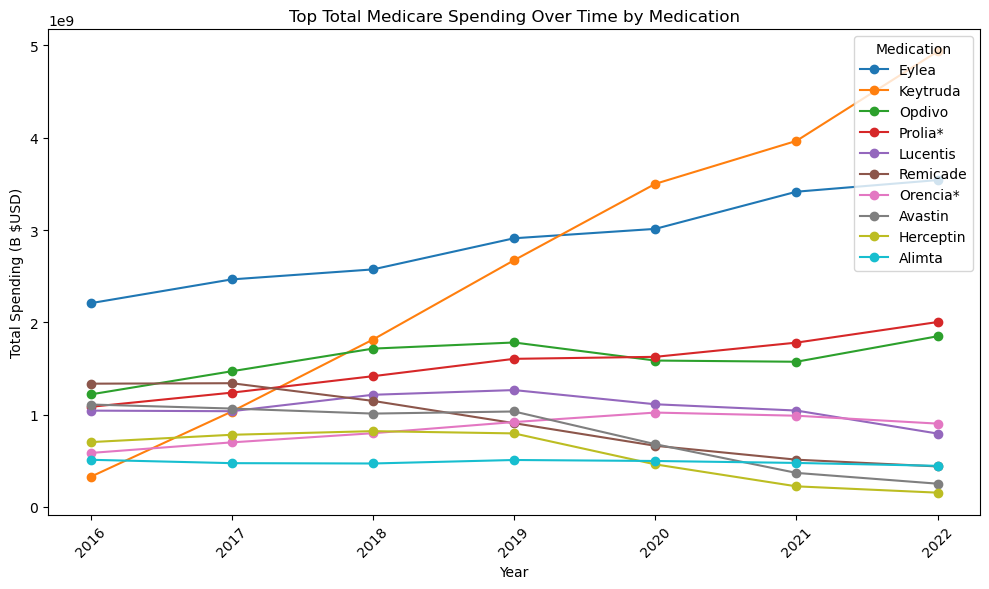

['2016_Total_Spending', '2017_Total_Spending', '2018_Total_Spending', '2019_Total_Spending', '2020_Total_Spending', '2021_Total_Spending', '2022_Total_Spending']


In [99]:
column = '_Total_Spending'
claim_columns = list(medications_df.loc[:,medications_df.columns.str.endswith(column)].columns.sort_values().values)
named_columns = ['HCPCS_Code', 'Brand_Name'] + claim_columns

plt.figure(figsize=(10, 6))

years = [col.replace(column, '') for col in claim_columns]

# Loop over each brand and plot their values
for index, row in total_spending_medications_df.head(10).iterrows():
    plt.plot(years, row[claim_columns], marker='o', label=row['Brand_Name'])

# Labeling the plot
plt.title('Top Total Medicare Spending Over Time by Medication')
plt.xlabel('Year')
plt.ylabel('Total Spending (B $USD)')
plt.xticks(rotation=45)
plt.legend(title='Medication', loc='upper right')
# plt.ticklabel_format(style='plain', axis='y', )
# Show the plot
plt.tight_layout()
plt.show()
print(claim_columns)

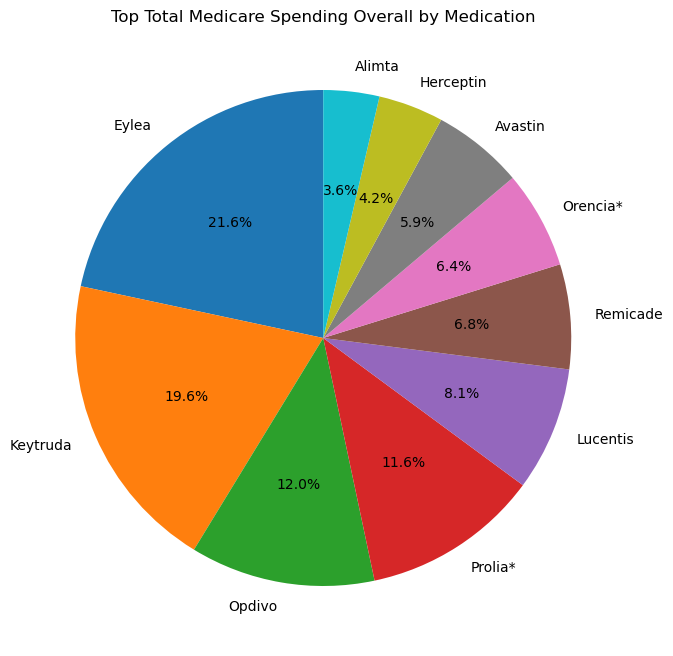

In [112]:
top_spending = total_spending_medications_df.head(10)
labels = top_spending['Brand_Name']
sizes = top_spending['Avg_per_brand']

plt.figure(figsize=(8,8))
plt.axis('equal')
plt.title('Top Total Medicare Spending Overall by Medication')
plt.pie(sizes, labels=labels, startangle=90, autopct='%1.1f%%')
plt.show()

In [114]:
total_spending_medications_df['Delta_Spending'] = total_spending_medications_df['2022_Total_Spending'] - total_spending_medications_df['2016_Total_Spending'] 
total_spending_diff_medications_df = total_spending_medications_df.sort_values(by='Delta_Spending', ascending=False)
total_spending_diff_medications_df

,HCPCS_Code,Brand_Name,2016_Total_Spending,2017_Total_Spending,2018_Total_Spending,2019_Total_Spending,2020_Total_Spending,2021_Total_Spending,2022_Total_Spending,Avg_per_brand,Delta_Spending
0,J9271,Keytruda,326441184,1033716692,1813727266,2673427540,3500947569,3966530837,4935971049,2.607252e+09,4609529865
1,J0178,Eylea,2207882152,2465832791,2573938386,2911408262,3013081886,3415890772,3541909703,2.875706e+09,1334027551
2,J0897,Prolia*,1085135202,1238722483,1416968972,1605208840,1626844122,1780811014,2003916528,1.536801e+09,918781326
3,J9299,Opdivo,1219517891,1470525369,1715907187,1782346827,1586591103,1573611852,1849938540,1.599777e+09,630420649
7,J3380,Entyvio,117594439,182585693,243007130,333606943,434481708,526528196,673755474,3.587942e+08,556161035
...,...,...,...,...,...,...,...,...,...,...,...
4,J2778,Lucentis,1044105658,1037747583,1215701656,1266791097,1113026179,1044929993,795501258,1.073972e+09,-248604400
103,J9033,Treanda,263268523,57259503,44821632,25796278,11052574,17020133,11895842,6.158778e+07,-251372681
31,J9355,Herceptin,702888943,782404051,821766301,797279495,461732465,223709770,155340135,5.635887e+08,-547548808
18,J9035,Avastin,1110360973,1066675107,1011988293,1034812258,680539026,369311857,252453961,7.894488e+08,-857907012


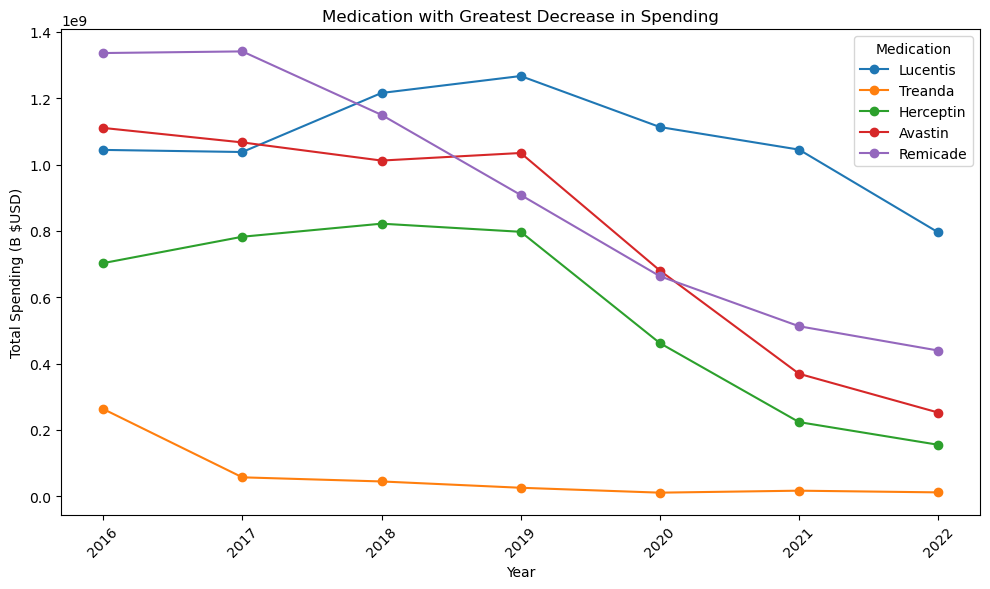

['2016_Total_Spending', '2017_Total_Spending', '2018_Total_Spending', '2019_Total_Spending', '2020_Total_Spending', '2021_Total_Spending', '2022_Total_Spending']


In [118]:
column = '_Total_Spending'
claim_columns = list(medications_df.loc[:,medications_df.columns.str.endswith(column)].columns.sort_values().values)
named_columns = ['HCPCS_Code', 'Brand_Name'] + claim_columns

plt.figure(figsize=(10, 6))

years = [col.replace(column, '') for col in claim_columns]
    
# Loop over each brand and plot their values
for index, row in total_spending_diff_medications_df.tail(5).iterrows():
    plt.plot(years, row[claim_columns], marker='o', label=row['Brand_Name'])

# Labeling the plot
plt.title('Medication with Greatest Decrease in Spending')
plt.xlabel('Year')
plt.ylabel('Total Spending (B $USD)')
plt.xticks(rotation=45)
plt.legend(title='Medication', loc='upper right')
# plt.ticklabel_format(style='plain', axis='y', )
# Show the plot
plt.tight_layout()
plt.show()
print(claim_columns)

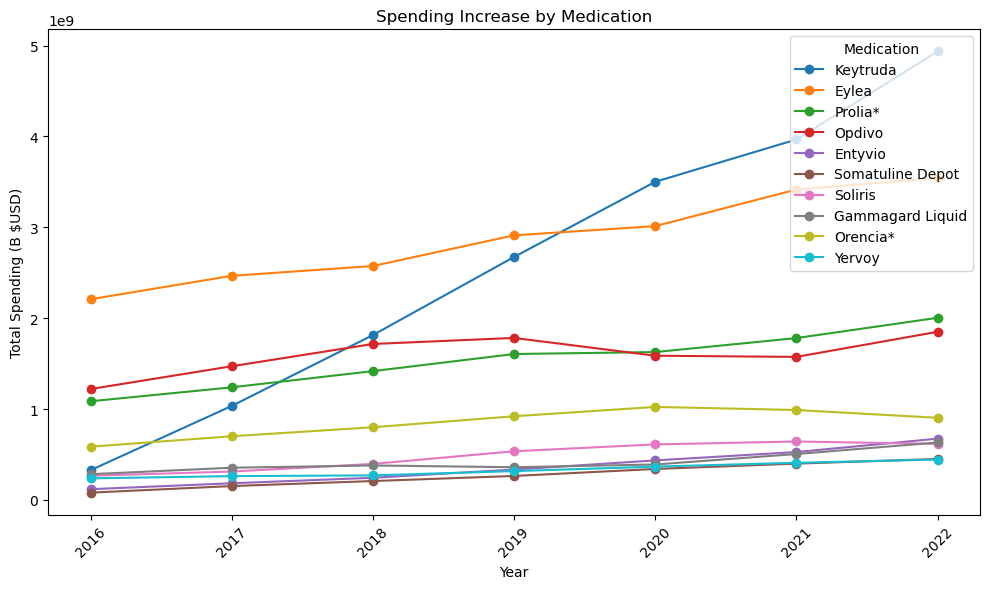

['2016_Total_Spending', '2017_Total_Spending', '2018_Total_Spending', '2019_Total_Spending', '2020_Total_Spending', '2021_Total_Spending', '2022_Total_Spending']


In [117]:
column = '_Total_Spending'
claim_columns = list(medications_df.loc[:,medications_df.columns.str.endswith(column)].columns.sort_values().values)
named_columns = ['HCPCS_Code', 'Brand_Name'] + claim_columns

plt.figure(figsize=(10, 6))

years = [col.replace(column, '') for col in claim_columns]

# Loop over each brand and plot their values
for index, row in total_spending_diff_medications_df.head(10).iterrows():
    plt.plot(years, row[claim_columns], marker='o', label=row['Brand_Name'])

# Labeling the plot
plt.title('Spending Increase by Medication')
plt.xlabel('Year')
plt.ylabel('Total Spending (B $USD)')
plt.xticks(rotation=45)
plt.legend(title='Medication', loc='upper right')
# plt.ticklabel_format(style='plain', axis='y', )
# Show the plot
plt.tight_layout()
plt.show()
print(claim_columns)

In [46]:

claim_columns = list(medications_df.loc[:,medications_df.columns.str.endswith(tuple(['_Total_Beneficiaries', '_Total_Claims']))].columns.sort_values().values)
named_columns = ['HCPCS_Code', 'Brand_Name'] + claim_columns

claims_beneficiaries_medications_df = medications_df[named_columns]
claims_beneficiaries_medications_df

,HCPCS_Code,Brand_Name,2016_Total_Beneficiaries,2016_Total_Claims,2017_Total_Beneficiaries,2017_Total_Claims,2018_Total_Beneficiaries,2018_Total_Claims,2019_Total_Beneficiaries,2019_Total_Claims,2020_Total_Beneficiaries,2020_Total_Claims,2021_Total_Beneficiaries,2021_Total_Claims,2022_Total_Beneficiaries,2022_Total_Claims
0,J9271,Keytruda,7332,36743,21816,109885,35491,201492,49743,293728,58699,355684,62830,373954,67022,407389
1,J0178,Eylea,210340,1047032,229369,1162647,240910,1228011,268296,1391256,284454,1435329,309699,1635603,338615,1698624
2,J0897,Prolia*,418691,868024,470360,952934,533286,1078076,589684,1192252,588171,1161150,629724,1241745,657400,1280103
3,J9299,Opdivo,27665,190578,29076,221210,32846,239434,29910,212722,25352,175292,25426,173365,26957,181918
4,J2778,Lucentis,106389,525114,105197,524318,123389,618921,130748,673557,120647,611396,114432,604786,102227,513440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,J1630,Haldol*,233,519,245,458,198,380,190,313,131,209,104,202,98,193
415,J3105,Terbutaline Sulfate,269,447,218,374,226,354,227,390,128,214,98,169,63,113
416,J1160,Digoxin*,5708,6003,69,81,56,60,44,51,29,30,29,31,24,25
417,J2501,Paricalcitol*,46,121,47,198,49,224,44,158,28,156,56,184,12,18


In [48]:
years = range(2016, 2023)

for year in years:
    claims_beneficiaries_medications_df[f"{year}_Claim_Beneficiary_Perc"] = claims_beneficiaries_medications_df[f"{year}_Total_Beneficiaries"] / claims_beneficiaries_medications_df[f"{year}_Total_Claims"]

claims_beneficiaries_medications_df

/var/folders/0g/m_btl88n5hs7w95j59p7v2180000gn/T/ipykernel_45110/4238651348.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  claims_beneficiaries_medications_df[f"{year}_Claim_Beneficiary_Perc"] = claims_beneficiaries_medications_df[f"{year}_Total_Beneficiaries"] / claims_beneficiaries_medications_df[f"{year}_Total_Claims"]


,HCPCS_Code,Brand_Name,2016_Total_Beneficiaries,2016_Total_Claims,2017_Total_Beneficiaries,2017_Total_Claims,2018_Total_Beneficiaries,2018_Total_Claims,2019_Total_Beneficiaries,2019_Total_Claims,2020_Total_Beneficiaries,2020_Total_Claims,2021_Total_Beneficiaries,2021_Total_Claims,2022_Total_Beneficiaries,2022_Total_Claims,2016_Claim_Beneficiary_Perc,2017_Claim_Beneficiary_Perc,2018_Claim_Beneficiary_Perc,2019_Claim_Beneficiary_Perc,2020_Claim_Beneficiary_Perc,2021_Claim_Beneficiary_Perc,2022_Claim_Beneficiary_Perc
0,J9271,Keytruda,7332,36743,21816,109885,35491,201492,49743,293728,58699,355684,62830,373954,67022,407389,0.199548,0.198535,0.176141,0.169351,0.165031,0.168015,0.164516
1,J0178,Eylea,210340,1047032,229369,1162647,240910,1228011,268296,1391256,284454,1435329,309699,1635603,338615,1698624,0.200892,0.197282,0.196179,0.192844,0.198180,0.189349,0.199347
2,J0897,Prolia*,418691,868024,470360,952934,533286,1078076,589684,1192252,588171,1161150,629724,1241745,657400,1280103,0.482350,0.493591,0.494665,0.494597,0.506542,0.507128,0.513552
3,J9299,Opdivo,27665,190578,29076,221210,32846,239434,29910,212722,25352,175292,25426,173365,26957,181918,0.145164,0.131441,0.137182,0.140606,0.144627,0.146662,0.148182
4,J2778,Lucentis,106389,525114,105197,524318,123389,618921,130748,673557,120647,611396,114432,604786,102227,513440,0.202602,0.200636,0.199361,0.194116,0.197330,0.189211,0.199102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,J1630,Haldol*,233,519,245,458,198,380,190,313,131,209,104,202,98,193,0.448940,0.534934,0.521053,0.607029,0.626794,0.514851,0.507772
415,J3105,Terbutaline Sulfate,269,447,218,374,226,354,227,390,128,214,98,169,63,113,0.601790,0.582888,0.638418,0.582051,0.598131,0.579882,0.557522
416,J1160,Digoxin*,5708,6003,69,81,56,60,44,51,29,30,29,31,24,25,0.950858,0.851852,0.933333,0.862745,0.966667,0.935484,0.960000
417,J2501,Paricalcitol*,46,121,47,198,49,224,44,158,28,156,56,184,12,18,0.380165,0.237374,0.218750,0.278481,0.179487,0.304348,0.666667


In [49]:
top_spending_medication_codes = total_spending_medications_df['HCPCS_Code'].head(10)
top_spending_medication_codes

0    J9271
1    J0178
2    J0897
3    J9299
4    J2778
5    J0129
6    J1300
7    J3380
8    J1745
9    J1569
Name: HCPCS_Code, dtype: object

In [52]:
top_clm_ben_medications = claims_beneficiaries_medications_df[claims_beneficiaries_medications_df['HCPCS_Code'].isin(top_spending_medication_codes)]


,HCPCS_Code,Brand_Name,2016_Total_Beneficiaries,2016_Total_Claims,2017_Total_Beneficiaries,2017_Total_Claims,2018_Total_Beneficiaries,2018_Total_Claims,2019_Total_Beneficiaries,2019_Total_Claims,2020_Total_Beneficiaries,2020_Total_Claims,2021_Total_Beneficiaries,2021_Total_Claims,2022_Total_Beneficiaries,2022_Total_Claims,2016_Claim_Beneficiary_Perc,2017_Claim_Beneficiary_Perc,2018_Claim_Beneficiary_Perc,2019_Claim_Beneficiary_Perc,2020_Claim_Beneficiary_Perc,2021_Claim_Beneficiary_Perc,2022_Claim_Beneficiary_Perc
0,J9271,Keytruda,7332,36743,21816,109885,35491,201492,49743,293728,58699,355684,62830,373954,67022,407389,0.199548,0.198535,0.176141,0.169351,0.165031,0.168015,0.164516
1,J0178,Eylea,210340,1047032,229369,1162647,240910,1228011,268296,1391256,284454,1435329,309699,1635603,338615,1698624,0.200892,0.197282,0.196179,0.192844,0.198180,0.189349,0.199347
2,J0897,Prolia*,418691,868024,470360,952934,533286,1078076,589684,1192252,588171,1161150,629724,1241745,657400,1280103,0.482350,0.493591,0.494665,0.494597,0.506542,0.507128,0.513552
3,J9299,Opdivo,27665,190578,29076,221210,32846,239434,29910,212722,25352,175292,25426,173365,26957,181918,0.145164,0.131441,0.137182,0.140606,0.144627,0.146662,0.148182
4,J2778,Lucentis,106389,525114,105197,524318,123389,618921,130748,673557,120647,611396,114432,604786,102227,513440,0.202602,0.200636,0.199361,0.194116,0.197330,0.189211,0.199102
5,J0129,Orencia*,22852,190822,24409,201046,26726,219711,29031,241954,29764,251054,31429,265060,31922,276427,0.119756,0.121410,0.121642,0.119986,0.118556,0.118573,0.115481
6,J1300,Soliris,689,10328,776,11662,1161,16063,1585,21014,1651,22954,1645,24343,1514,21641,0.066712,0.066541,0.072278,0.075426,0.071926,0.067576,0.069960
7,J3380,Entyvio,4913,23324,6759,34179,8882,46859,11479,62169,13751,78242,15742,92268,17466,103942,0.210641,0.197753,0.189547,0.184642,0.175750,0.170612,0.168036
8,J1745,Remicade,58352,339552,56429,322216,52085,296606,48114,278135,44272,257282,41903,246483,39798,232563,0.171850,0.175128,0.175603,0.172988,0.172076,0.170004,0.171128
9,J1569,Gammagard Liquid,12021,86488,15426,107894,17633,121151,19393,123260,16672,130703,18538,148968,21652,170023,0.138990,0.142974,0.145546,0.157334,0.127556,0.124443,0.127347


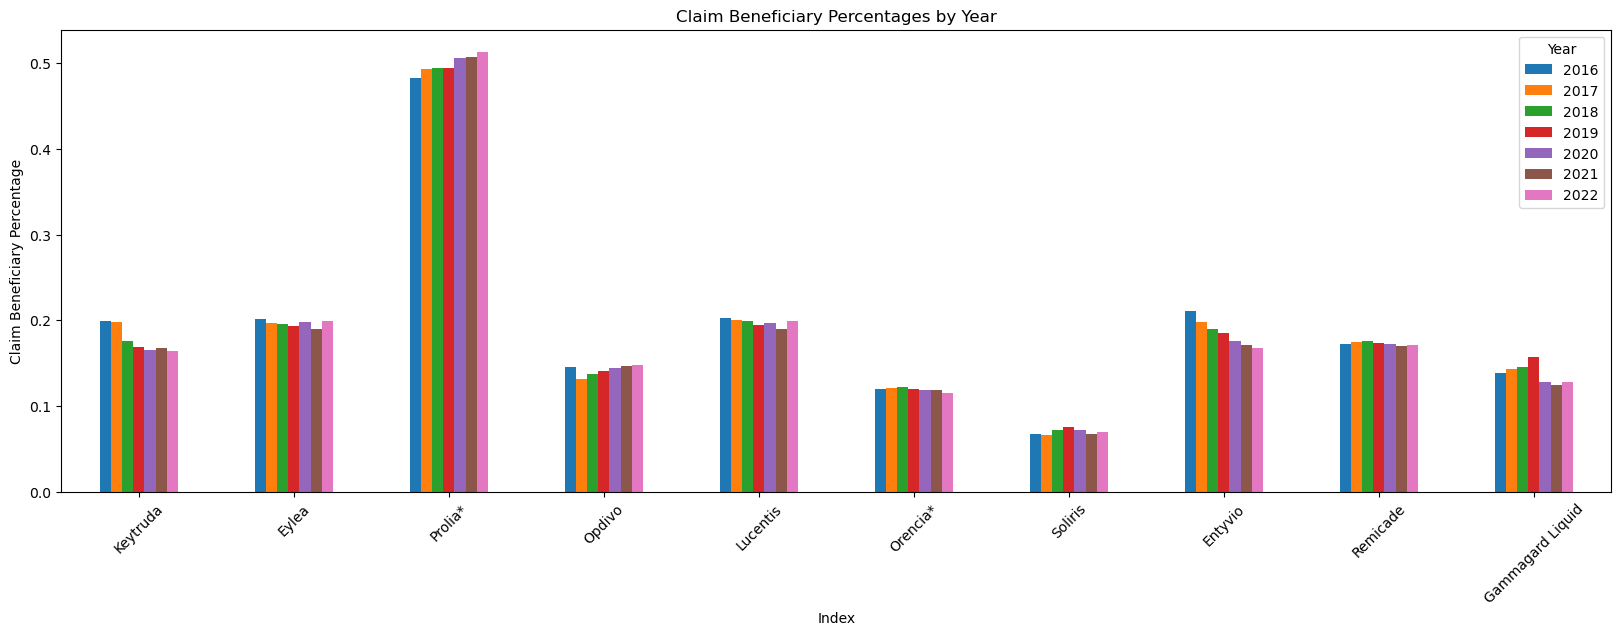

In [76]:
claim_columns = list(top_clm_ben_medications.loc[:,top_clm_ben_medications.columns.str.endswith(tuple(['_Claim_Beneficiary_Perc']))].columns.values)
named_columns = ['HCPCS_Code', 'Brand_Name'] + claim_columns
years = [col.replace('_Claim_Beneficiary_Perc', '') for col in claim_columns]
top_clm_ben_medications[named_columns].plot(kind='bar', figsize=(20, 6))

plt.xlabel('Index')
plt.ylabel('Claim Beneficiary Percentage')
plt.title('Claim Beneficiary Percentages by Year')
plt.xticks(rotation=45, labels=top_clm_ben_medications['Brand_Name'], ticks=range(len(top_clm_ben_medications.index)))
plt.legend(title='Year', loc='upper right', labels=years)
# plt.xticks(ticks=range(len(df.index)), labels=xtick_labels)

# Showing the plot
plt.show()

In [77]:
column = '_Total_Claims'
claim_columns = list(medications_df.loc[:,medications_df.columns.str.endswith(column)].columns.sort_values().values)
named_columns = ['HCPCS_Code', 'Brand_Name'] + claim_columns

medications_claims_df = medications_df[named_columns]
medications_claims_df

,HCPCS_Code,Brand_Name,2016_Total_Claims,2017_Total_Claims,2018_Total_Claims,2019_Total_Claims,2020_Total_Claims,2021_Total_Claims,2022_Total_Claims
0,J9271,Keytruda,36743,109885,201492,293728,355684,373954,407389
1,J0178,Eylea,1047032,1162647,1228011,1391256,1435329,1635603,1698624
2,J0897,Prolia*,868024,952934,1078076,1192252,1161150,1241745,1280103
3,J9299,Opdivo,190578,221210,239434,212722,175292,173365,181918
4,J2778,Lucentis,525114,524318,618921,673557,611396,604786,513440
...,...,...,...,...,...,...,...,...,...
414,J1630,Haldol*,519,458,380,313,209,202,193
415,J3105,Terbutaline Sulfate,447,374,354,390,214,169,113
416,J1160,Digoxin*,6003,81,60,51,30,31,25
417,J2501,Paricalcitol*,121,198,224,158,156,184,18


In [81]:
medications_claims_df['Overall_Claims'] = medications_claims_df.iloc[:,2:].sum(axis=1)
top_medications_claims_df = medications_claims_df.sort_values(by='Overall_Claims', ascending=False).head(10)
top_medications_claims_df

/var/folders/0g/m_btl88n5hs7w95j59p7v2180000gn/T/ipykernel_45110/1540717307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medications_claims_df['Overall_Claims'] = medications_claims_df.iloc[:,2:].sum(axis=1)


,HCPCS_Code,Brand_Name,2016_Total_Claims,2017_Total_Claims,2018_Total_Claims,2019_Total_Claims,2020_Total_Claims,2021_Total_Claims,2022_Total_Claims,Overall_Claims
102,J3301,Kenalog*,2952177,3036476,3085298,3230378,2666903,2961965,3521176,85817492
181,J1100,Dexamethasone Sodium Phosphate*,2534269,2536695,2502683,2504573,1969235,1985963,2043329,64306988
168,J3420,Cyanocobalamin*,2441874,2394186,2286899,2258899,1750491,1806138,1716729,58620864
118,J1030,Depo-Medrol (J1030)*,1970740,1969507,1893658,1899841,1463617,1444693,988833,46523556
1,J0178,Eylea,1047032,1162647,1228011,1391256,1435329,1635603,1698624,38394008
133,J7613,Albuterol Sulfate (J7613),1504887,1479114,1438587,1359168,1126818,871583,784023,34256720
122,J7620,Ipratropium-Albuterol,1436362,1449275,1432973,1376915,1146045,876964,775159,33974772
120,Q9967,Hexabrix*,1212201,1212936,1221493,1255007,1160344,1238070,1187918,33951876
119,J1040,Depo-Medrol (J1040)*,1508596,1476288,1375883,1345899,995275,958951,653421,33257252
2,J0897,Prolia*,868024,952934,1078076,1192252,1161150,1241745,1280103,31097136


In [86]:
top_medications_claims_df.set_index('Brand_Name', inplace=True)


KeyError: "None of ['Brand_Name'] are in the columns"

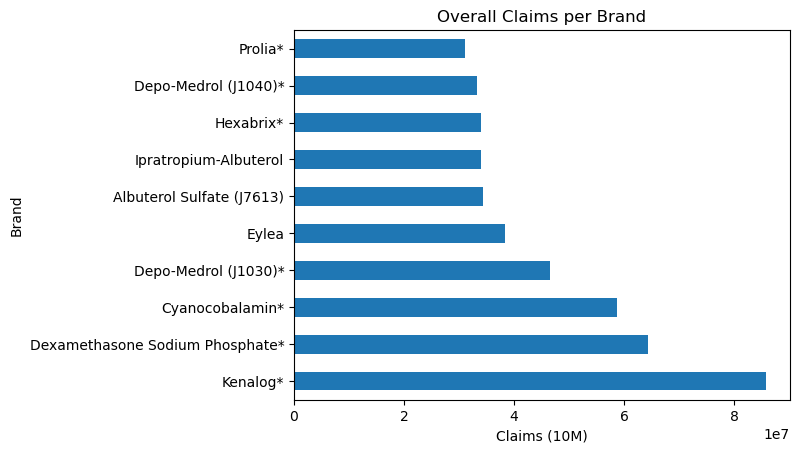

In [95]:
top_medications_claims_df
ax = top_medications_claims_df[['Overall_Claims']].plot(kind='barh')
# plt.legend(None)
# plt.xticks(rotation=45)
# ax.invert_xaxis()
plt.xlabel('Claims (10M)')
plt.ylabel('Brand')
plt.title('Overall Claims per Brand')
ax.get_legend().remove()
plt.show()